In [3]:
import pandas as pd

In [19]:
import json

with open('../outputs/0000-20GXCGEAYD-DXTK2BY7E7.json') as data_file:
    data = json.load(data_file)

In [40]:
data

{'hash': 'DXTK2BY7E7',
 'nextRunInfo': {'atomTypes': [1, 6, 7],
  'neededParams': [[0, 1, 3, 5, 7],
   [0, 1, 2, 3, 4, 5, 6, 7],
   [0, 1, 2, 3, 4, 5, 6, 7]],
  'params': [[2.5510260164490606,
    -6.989042778292852,
    0.0,
    -11.906275858250169,
    0.0,
    1.3320086674438079,
    0.0,
    -11.905550320692871,
    12.848,
    0.0,
    0.0,
    0.0,
    0.0],
   [2.5464394910558523,
    -18.984963247747714,
    -7.934265271412827,
    -52.280629781679046,
    -39.2053225840332,
    1.7886735622957142,
    1.7868887988681545,
    -120.55009731769903,
    12.23,
    11.47,
    2.43,
    11.08,
    9.84],
   [2.861342,
    -20.495758,
    -20.495758,
    -71.932122,
    -57.172319,
    2.255614,
    2.255614,
    -202.581201,
    13.59,
    12.66,
    3.14,
    12.98,
    11.59]]},
 'results': [{'updatedRm': {'index': 0,
    'name': 'H10C6',
    'restricted': True,
    'charge': 0,
    'mult': 1,
    'datum': [-1.1, 0.0, 0.0],
    'mats': [1, 6],
    'mnps': [[0, 1, 3, 5, 7], [0, 1, 

In [35]:
dict1 = [{
    'index': x['updatedRm']['index'],
    'name': x['updatedRm']['name'],
    'error': x['totalError']
} for x in data['results']]

In [36]:
df = pd.DataFrame(dict1);

In [37]:
df

,index,name,error
0,0,H10C6,113.108878
1,1,H9C4,21.215046


You should consider upgrading via the 'C:\Users\billi\IdeaProjects\MNDOParam\venv\Scripts\python.exe -m pip install --upgrade pip' command.


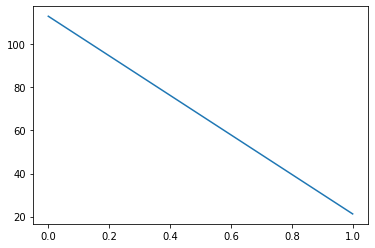

In [39]:
import matplotlib.pyplot as plt

plt.plot(df.error)
